- SRC :  https://www.kaggle.com/datasets/yogeshtekawade/banking-and-customer-transaction-data
    - customer_data.csv - données démographiques et profils client
        - Utilité : segmentation client, ciblage marketing, prédiction de churn
            - Ce fichier permet de relier les comportements transactionnels à des profils clients distincts, ce qui est essentiel pour une classification supervisée.

## Chargement des données
## Nettoyage des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os

c:\Users\Admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
directory_path = r'C:\Users\Admin\Desktop\BankingMLProject\data'
filename = 'customer_data.csv'
filename_path = os.path.join(directory_path, filename)
print(os.path.join(directory_path, filename))
filename_path

C:\Users\Admin\Desktop\BankingMLProject\data\customer_data.csv


'C:\\Users\\Admin\\Desktop\\BankingMLProject\\data\\customer_data.csv'

In [4]:
# Chargement du fichier
df = pd.read_csv(filename_path)

In [5]:
# Affichage des 5 premières lignes pour inspection
df.head()

,Customer_ID,Age,Customer_Type,City,Region,Bank_Name,Branch_ID
0,200000,56.0,Employee,Pune,North,HDFC Bank,1350
1,200001,69.0,NaN,Kolhapur,East,HDFC Bank,1648
2,200002,46.0,Business,Pune,West,HDFC Bank,1798
3,200003,32.0,Individual,Pune,West,HDFC Bank,1900
4,200004,NaN,Business,Kolhapur,East,HDFC Bank,1227


In [6]:
print(df.columns)

Index(['Customer_ID', 'Age', 'Customer_Type', 'City', 'Region', 'Bank_Name',
       'Branch_ID'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_ID    10000 non-null  int64  
 1   Age            9500 non-null   float64
 2   Customer_Type  9500 non-null   object 
 3   City           9500 non-null   object 
 4   Region         10000 non-null  object 
 5   Bank_Name      10000 non-null  object 
 6   Branch_ID      10000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


In [8]:
df.describe()

,Customer_ID,Age,Branch_ID
count,10000.00000,9500.000000,10000.000000
mean,204999.50000,48.754421,1497.829300
std,2886.89568,17.919179,288.758237
min,200000.00000,18.000000,1000.000000
25%,202499.75000,33.000000,1246.000000
50%,204999.50000,49.000000,1499.000000
75%,207499.25000,64.000000,1747.000000
max,209999.00000,79.000000,1999.000000


In [9]:
df.nunique()

Customer_ID      10000
Age                 62
Customer_Type        3
City                 6
Region               4
Bank_Name            1
Branch_ID         1000
dtype: int64

## Nettoyage des données

In [10]:
# Vérification des valeurs manquantes
df.isnull().sum()


Customer_ID        0
Age              500
Customer_Type    500
City             500
Region             0
Bank_Name          0
Branch_ID          0
dtype: int64

Valeurs manquantes : est-ce negligeable ?
Age              500
Customer_Type    500
City             500

In [11]:
missing_values = df.isnull().sum()
percentage_missing_values = (missing_values / len(df)) * 100
print(percentage_missing_values)

Customer_ID      0.0
Age              5.0
Customer_Type    5.0
City             5.0
Region           0.0
Bank_Name        0.0
Branch_ID        0.0
dtype: float64


In [12]:
total_missing_values = df.isnull().sum().sum()
print(total_missing_values)

1500


In [13]:
total_cells = df.shape[0] * df.shape[1]
print(total_cells)

70000


In [14]:
total_missing_percentage = (total_missing_values / total_cells) * 100
print(total_missing_percentage)

2.142857142857143


<Axes: xlabel='Age'>

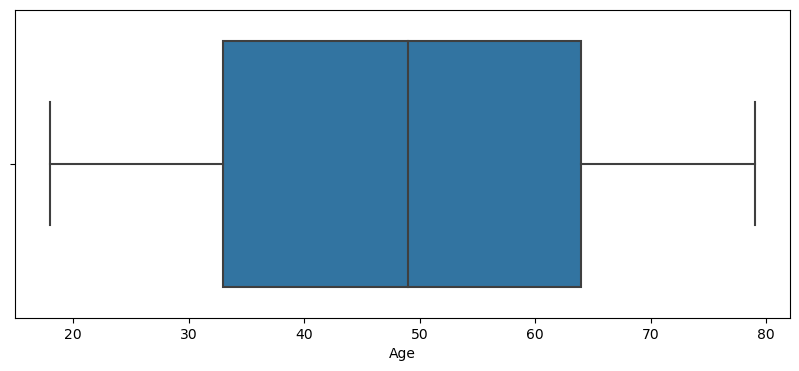

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='Age')

In [16]:
# Création d'une copie pour réaliser l'affectation de la moyenne
df_imputed_mean = df.copy()

In [17]:
df_imputed_mean['Age'].fillna(df_imputed_mean['Age'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10856\4268044983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_mean['Age'].fillna(df_imputed_mean['Age'].mean(), inplace=True)


In [18]:
# Vérification des doublons
df.drop_duplicates(inplace=True)
print()

In [21]:
# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)
print (df_encoded.head())

   Customer_ID   Age  Branch_ID  Customer_Type_Employee  \
0       200000  56.0       1350                    True   
1       200001  69.0       1648                   False   
2       200002  46.0       1798                   False   
3       200003  32.0       1900                   False   
4       200004   NaN       1227                   False   

   Customer_Type_Individual  City_Mumbai  City_Nagpur  City_Nashik  City_Pune  \
0                     False        False        False        False       True   
1                     False        False        False        False      False   
2                     False        False        False        False       True   
3                      True        False        False        False       True   
4                     False        False        False        False      False   

   City_Solapur  Region_North  Region_South  Region_West  
0         False          True         False        False  
1         False         False         Fa

In [ ]:
# Sauvegarde du dossier 'transaction_data_cleaned' pour la suite du projet
output_directory = r"C:\Users\Admin\Desktop\BankingMLProject\data"

# Nom du fichier CSV de sortie
output_filename = "customer_data_cleaned.csv"

# Création du chemin complet du fichier de sortie
output_filepath = os.path.join(output_directory, output_filename)

#Sauvegarder du DataFrame nettoyé en CSV
try:
    # index=False pour ne pas écrire l'index du DataFrame comme une colonne dans le CSV
    df.to_csv(output_filepath, index=False)
    print(f"\nDataFrame nettoyé sauvegardé avec succès dans : {output_filepath}")
except Exception as e:
    print(f"\nUne erreur est survenue lors de la sauvegarde : {e}")


DataFrame nettoyé sauvegardé avec succès dans : C:\Users\Admin\Desktop\BankingMLProject\data\customer_data_cleaned.csv
